In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [34]:
df= pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [35]:
df.sample(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
8390,Clock Tower II: The Struggle Within,PS,1998.0,Adventure,Human Entertainment,0.02,0.01,0.12,0.01,0.17,49.0,5.0,5.7,7.0,Human Entertainment,M
3088,Club Penguin: Elite Penguin Force - Herbert's ...,DS,2010.0,Adventure,Disney Interactive Studios,0.39,0.21,0.00,0.06,0.65,NaN,NaN,NaN,NaN,NaN,NaN
2326,FIFA Street,X360,2012.0,Sports,Electronic Arts,0.17,0.62,0.00,0.10,0.89,77.0,47.0,6.7,58.0,EA Sports,E
1491,Madden NFL 97,PS,1996.0,Sports,Electronic Arts,0.73,0.50,0.00,0.09,1.32,NaN,NaN,NaN,NaN,NaN,NaN
2766,Dragon Quest Heroes: The World's Tree Woe and ...,PS4,2015.0,Action,Square Enix,0.17,0.13,0.37,0.06,0.74,NaN,NaN,NaN,NaN,NaN,NaN
9685,Gundam Battle Royale,PSP,2006.0,Action,Namco Bandai Games,0.00,0.00,0.12,0.00,0.12,NaN,NaN,NaN,NaN,NaN,NaN
3399,Beijing 2008,X360,2008.0,Sports,Sega,0.15,0.38,0.00,0.07,0.59,NaN,NaN,NaN,NaN,NaN,NaN
15238,Kung Fu Panda,PC,2008.0,Action,Activision,0.00,0.02,0.00,0.00,0.02,71.0,11.0,7.8,12.0,Beenox,E10+
3076,Plants vs. Zombies: Garden Warfare,PS3,2014.0,Shooter,Electronic Arts,0.22,0.32,0.01,0.11,0.66,NaN,NaN,7.8,24.0,PopCap,E10+
10318,Happy Feet Two,PS3,NaN,Action,Warner Bros. Interactive Entertainment,0.09,0.00,0.00,0.01,0.11,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [37]:
df.drop(columns=["Critic_Score","Critic_Count","User_Score","User_Count","Developer","Rating"],inplace=True)

In [38]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01


In [39]:
df.duplicated().sum()

0

In [40]:
df.isnull().sum()

Name                 2
Platform             0
Year_of_Release    269
Genre                2
Publisher           54
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
dtype: int64

In [41]:
df.dropna(inplace=True)


In [42]:
df.shape

(16416, 10)

In [43]:
df.sample(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
12705,Ivy the Kiwi?,Wii,2010.0,Puzzle,Rising Star Games,0.04,0.02,0.00,0.00,0.06
13194,Reel Fishing: The Great Outdoors,PSP,2006.0,Sports,Natsume,0.05,0.00,0.00,0.00,0.05
3769,The LEGO Movie Videogame,XOne,2014.0,Action,Warner Bros. Interactive Entertainment,0.35,0.13,0.00,0.05,0.53
13534,Tropico 3,PC,2009.0,Strategy,Kalypso Media,0.00,0.04,0.00,0.01,0.04
8932,We Dance,Wii,2011.0,Misc,Nordic Games,0.00,0.13,0.00,0.02,0.15
2667,Unlimited Saga,PS2,2002.0,Role-Playing,Atari,0.10,0.08,0.56,0.03,0.77
16010,Sengoku Efuda Yuugi: Hototogisu Ran,PSP,2008.0,Misc,Irem Software Engineering,0.00,0.00,0.02,0.00,0.02
2983,Mercenaries: Playground of Destruction,XB,2005.0,Action,LucasArts,0.54,0.11,0.00,0.03,0.68
6088,SingStar Country,PS2,2008.0,Misc,Sony Computer Entertainment,0.14,0.11,0.00,0.04,0.28
13840,Akko ni Omakase! Brain Shock,DS,2006.0,Misc,Taito,0.00,0.00,0.04,0.00,0.04


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.war

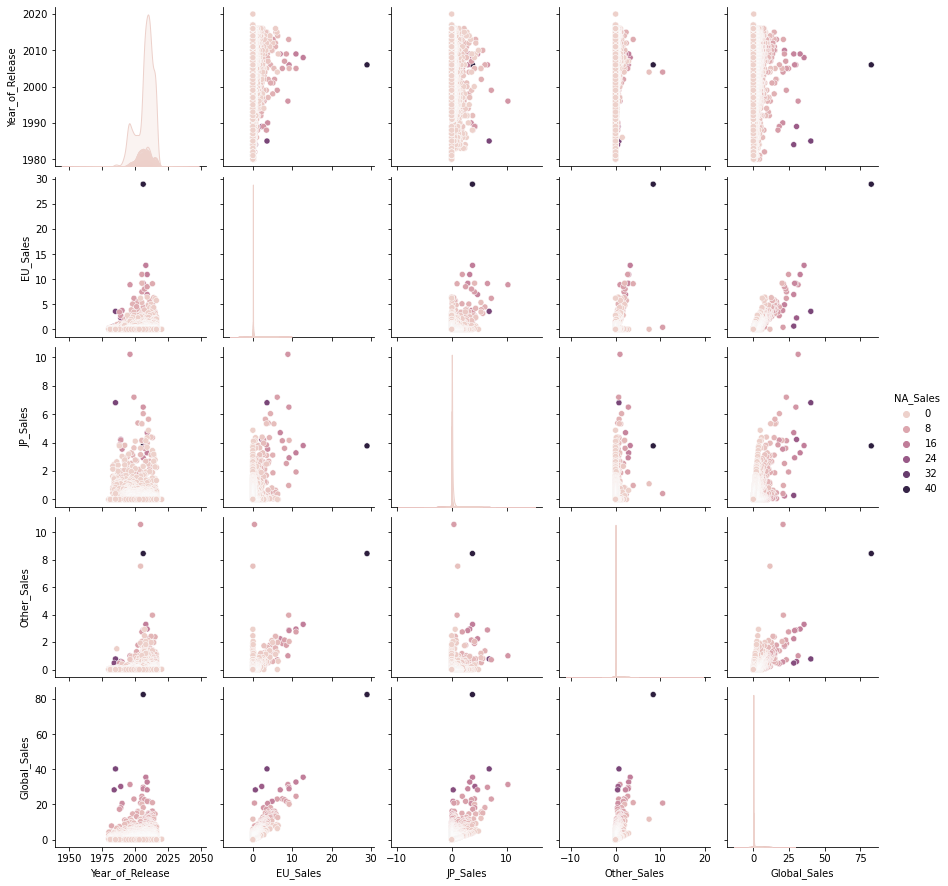

In [44]:
sns.pairplot(df,hue='NA_Sales')


<AxesSubplot:xlabel='Global_Sales', ylabel='Count'>

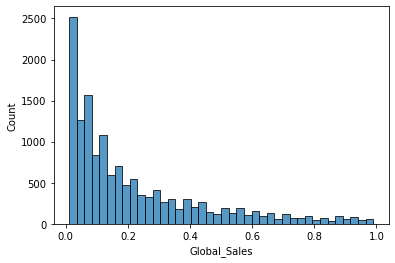

In [45]:
sns.histplot(df.Global_Sales[df.Global_Sales < 1], bins=40)


In [51]:
X = df.drop(['Name','Platform','Genre','Publisher','Global_Sales'],axis=1)
Y = df['Global_Sales']

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [53]:
model = LinearRegression()

In [54]:
model.fit(X_train,Y_train)

LinearRegression()

In [56]:
model.score(X_train,Y_train)

0.9999895937578646

In [57]:
model.predict(X_test)

array([0.16026783, 0.05026876, 0.03029222, ..., 0.46023324, 0.59024662,
       2.06013938])

In [58]:
Y_test

8425     0.17
12789    0.06
14462    0.03
11053    0.09
12156    0.07
         ... 
16478    0.01
8291     0.17
4197     0.47
3415     0.59
827      2.05
Name: Global_Sales, Length: 1642, dtype: float64